In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import spatial
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors, datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
%matplotlib inline

In [ ]:
adult = pd.read_csv("https://raw.githubusercontent.com/saaludahal/MyProject/main/adult.data.simplified%20(3).csv")

In [ ]:
adult.describe(include='all')

,age,workclass,education,educationyears,maritalstatus,occupation,relationship,race,sex,hoursperweek,nativecountry,incomeUSD
count,32561.000000,32561,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561,32561.000000
unique,NaN,9,16,NaN,7,15,6,5,2,NaN,42,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,United-States,NaN
freq,NaN,22696,10501,NaN,14976,4140,13193,27816,21790,NaN,29170,NaN
mean,38.581647,NaN,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,40.437456,NaN,56583.900587
std,13.640433,NaN,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,12.347429,NaN,44374.594314
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,20002.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,29994.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,39732.000000
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,49631.000000


In [ ]:
# Define the features and target variable
X = adult[['age', 'education', 'incomeUSD']]
y = adult['occupation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np

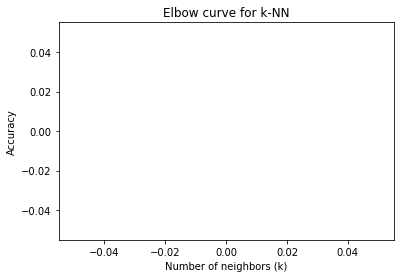

In [ ]:
# Load your dataset and split it into features (X) and target (y)

# Define the range of k values to test
k_values = np.arange(1, 50, 2)

# Create an empty list to store the mean accuracy for each k value
mean_accuracy = []

# Perform 5-fold cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    mean_accuracy.append(scores.mean())

# Plot the accuracy vs. k values to visualize the elbow curve
plt.plot(k_values, mean_accuracy, 'bo-')
plt.xlabel('Number of neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Elbow curve for k-NN')
plt.show()

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


In [ ]:
X = adult.drop('occupation', axis=1)
y = adult['occupation']

In [ ]:
X = pd.get_dummies(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Accuracy score:", accuracy)

Accuracy score: 0.1360356210655612


In [ ]:
adult = adult.drop('workclass', axis=1)

In [ ]:
print("Number of columns:", len(adult.columns))

Number of columns: 11


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
n_trees = 10
model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score:", accuracy)

Accuracy score: 0.32120374635344695


In [ ]:
n_trees = 100
model = RandomForestClassifier(n_estimators=n_trees, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score:", accuracy)

Accuracy score: 0.32719177030554275


In [ ]:
import statsmodels.api as sm

In [ ]:
X = adult[["age", "hoursperweek", "educationyears"]]
y = adult["incomeUSD"]

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              incomeUSD   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     1787.
Date:                Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                        06:58:52   Log-Likelihood:            -3.9214e+05
No. Observations:               32561   AIC:                         7.843e+05
Df Residuals:                   32557   BIC:                         7.843e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.308e+04   1250.569    -26.

In [ ]:
adult_france = adult[adult["nativecountry"] == "France"]

In [ ]:
train, test = train_test_split(adult_france, test_size=0.2, random_state=42)

In [ ]:
print("Number of rows in the test set:", len(test))

Number of rows in the test set: 6


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
ins_naivebayes = GaussianNB()

In [ ]:
naive_bayes_model = ins_naivebayes.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:

confusion_matrix(y_test, y_pred)

array([[389,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0, 255,   0,  62,  74,   5,  13,  36,  94,   3,  68,   6,  80,
         19,  11],
       [  0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,  59,   0, 282,  75,  39,  36,  69,  54,   0,  34,  13,  77,
         10,  73],
       [  0,  98,   0, 112, 235,  12,  10,  29,  32,   0, 148,  11, 109,
         16,  26],
       [  0,   6,   0,  45,  18,  46,   5,  10,  22,   0,   9,   2,  19,
          2,   9],
       [  0,  31,   0,  69,   9,   6,  35,  21,  42,   0,   8,   7,  24,
          2,  19],
       [  0,  49,   0, 106,  25,   9,  28,  52,  41,   0,   9,   1,  31,
          3,  24],
       [  0, 128,   0,  74,  43,  17,  38,  45, 179,   4,  22,   9,  75,
         10,  23],
       [  0,   4,   0,   2,   0,   0,   1,   2,  11,   2,   0,   0,   4,
          0,   0],
       [  0,  57,   0,  45, 173,   4,   7,  10,  23,   0, 428,  15,  49,
       

The optimal number of neighbors is 5


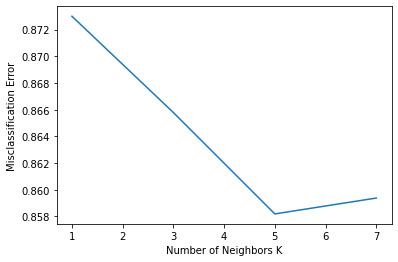

In [ ]:
klist = list(range(1, 9, 2))
cv_scores = []
for k in klist:
    model10 = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model10, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())
errors = 1 - np.array(cv_scores)
optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()



The optimal number of neighbors is 5


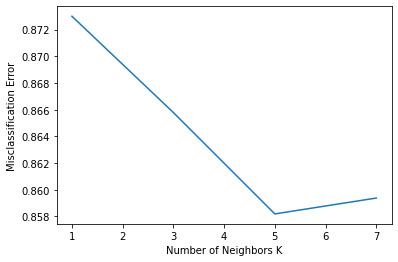

In [ ]:
klist = list(range(1, 9, 2))
cv_scores = []
for k in klist:
    model10 = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model10, X_train, y_train, cv = 5)
    cv_scores.append(scores.mean())
print("The optimal number of neighbors is {}".format(optimal_k))
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [ ]:

klist = list(range(1, 100, 5))
cv_scores = []
for k in klist:
    model10 = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model10, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())
print("The optimal number of neighbors is {}".format(optimal_k))
plt.plot(klist, errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()



In [ ]:
klist = list(range(1, 5, 2))
cv_scores = []
for k in klist:
    model10 = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(model10, X_train, y_train, cv = 50, scoring = 'accuracy')
    cv_scores.append(scores.mean())
errors = np.array(cv_scores)
optimal_k = klist[np.argmin(errors)]
print("The optimal number of neighbors is {}".format(optimal_k))
plt.plot(errors)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:

from sklearn.train_test_split import random
Xtrain, Xtest = pd.cut(train_test_split, train_size=25,000)



In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(adult_new, train_size=25000)



In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(adult_new, train_size=0.75, random_state=42)


In [ ]:

from pd.train_test_split import cut
y_train, y_test = pd.cut(train_test_split, test_size=25,000, random_state=42)